
Статистика по числовым признакам:
            Inches          Ram       Weight  Price_euros      ScreenW  \
count  1267.000000  1267.000000  1267.000000  1267.000000  1267.000000   
mean     15.036306     8.449882     2.046069  1135.684499  1898.099448   
std       1.418550     5.110746     0.666810   701.959852   494.116071   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1760.000000   
50%      15.600000     8.000000     2.040000   985.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1498.000000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1267.000000  1267.000000     1267.000000       1267.000000  
mean   1072.161010     2.309645      445.404893        177.180742  
std     283.656579     0.498277      366.248057        417.036556  
min     768.000000     0.9

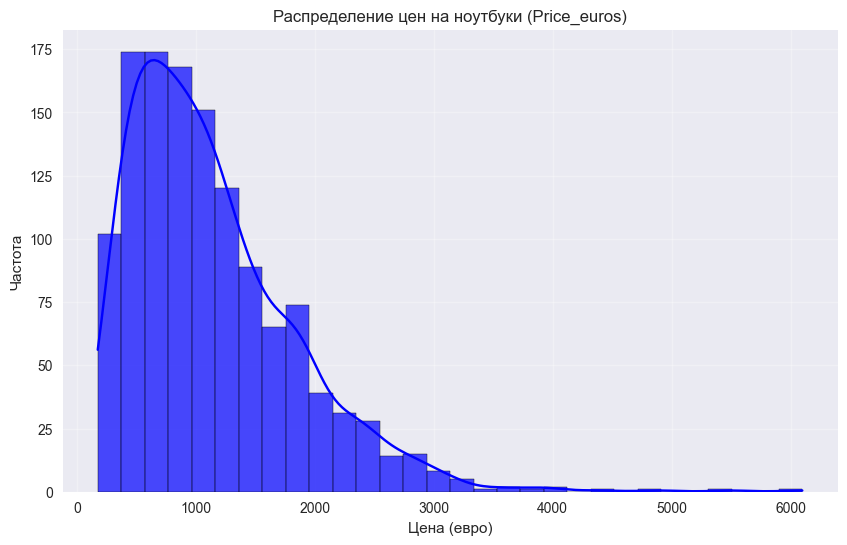

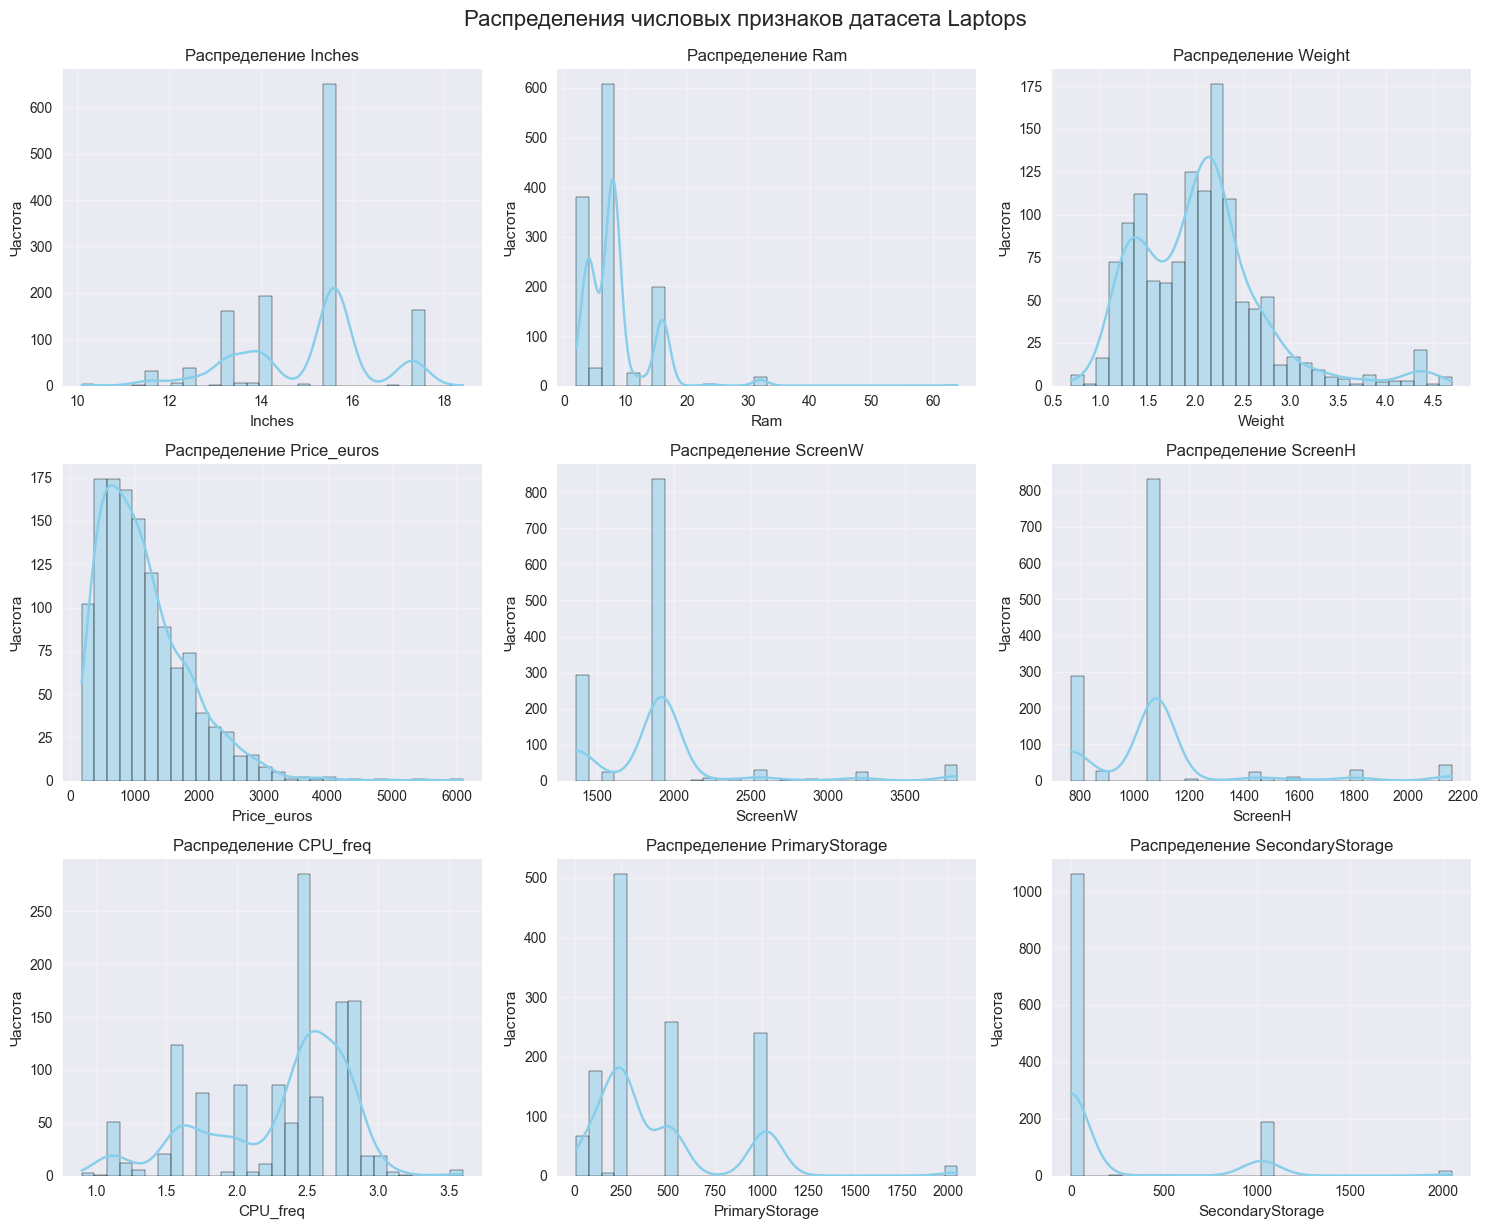

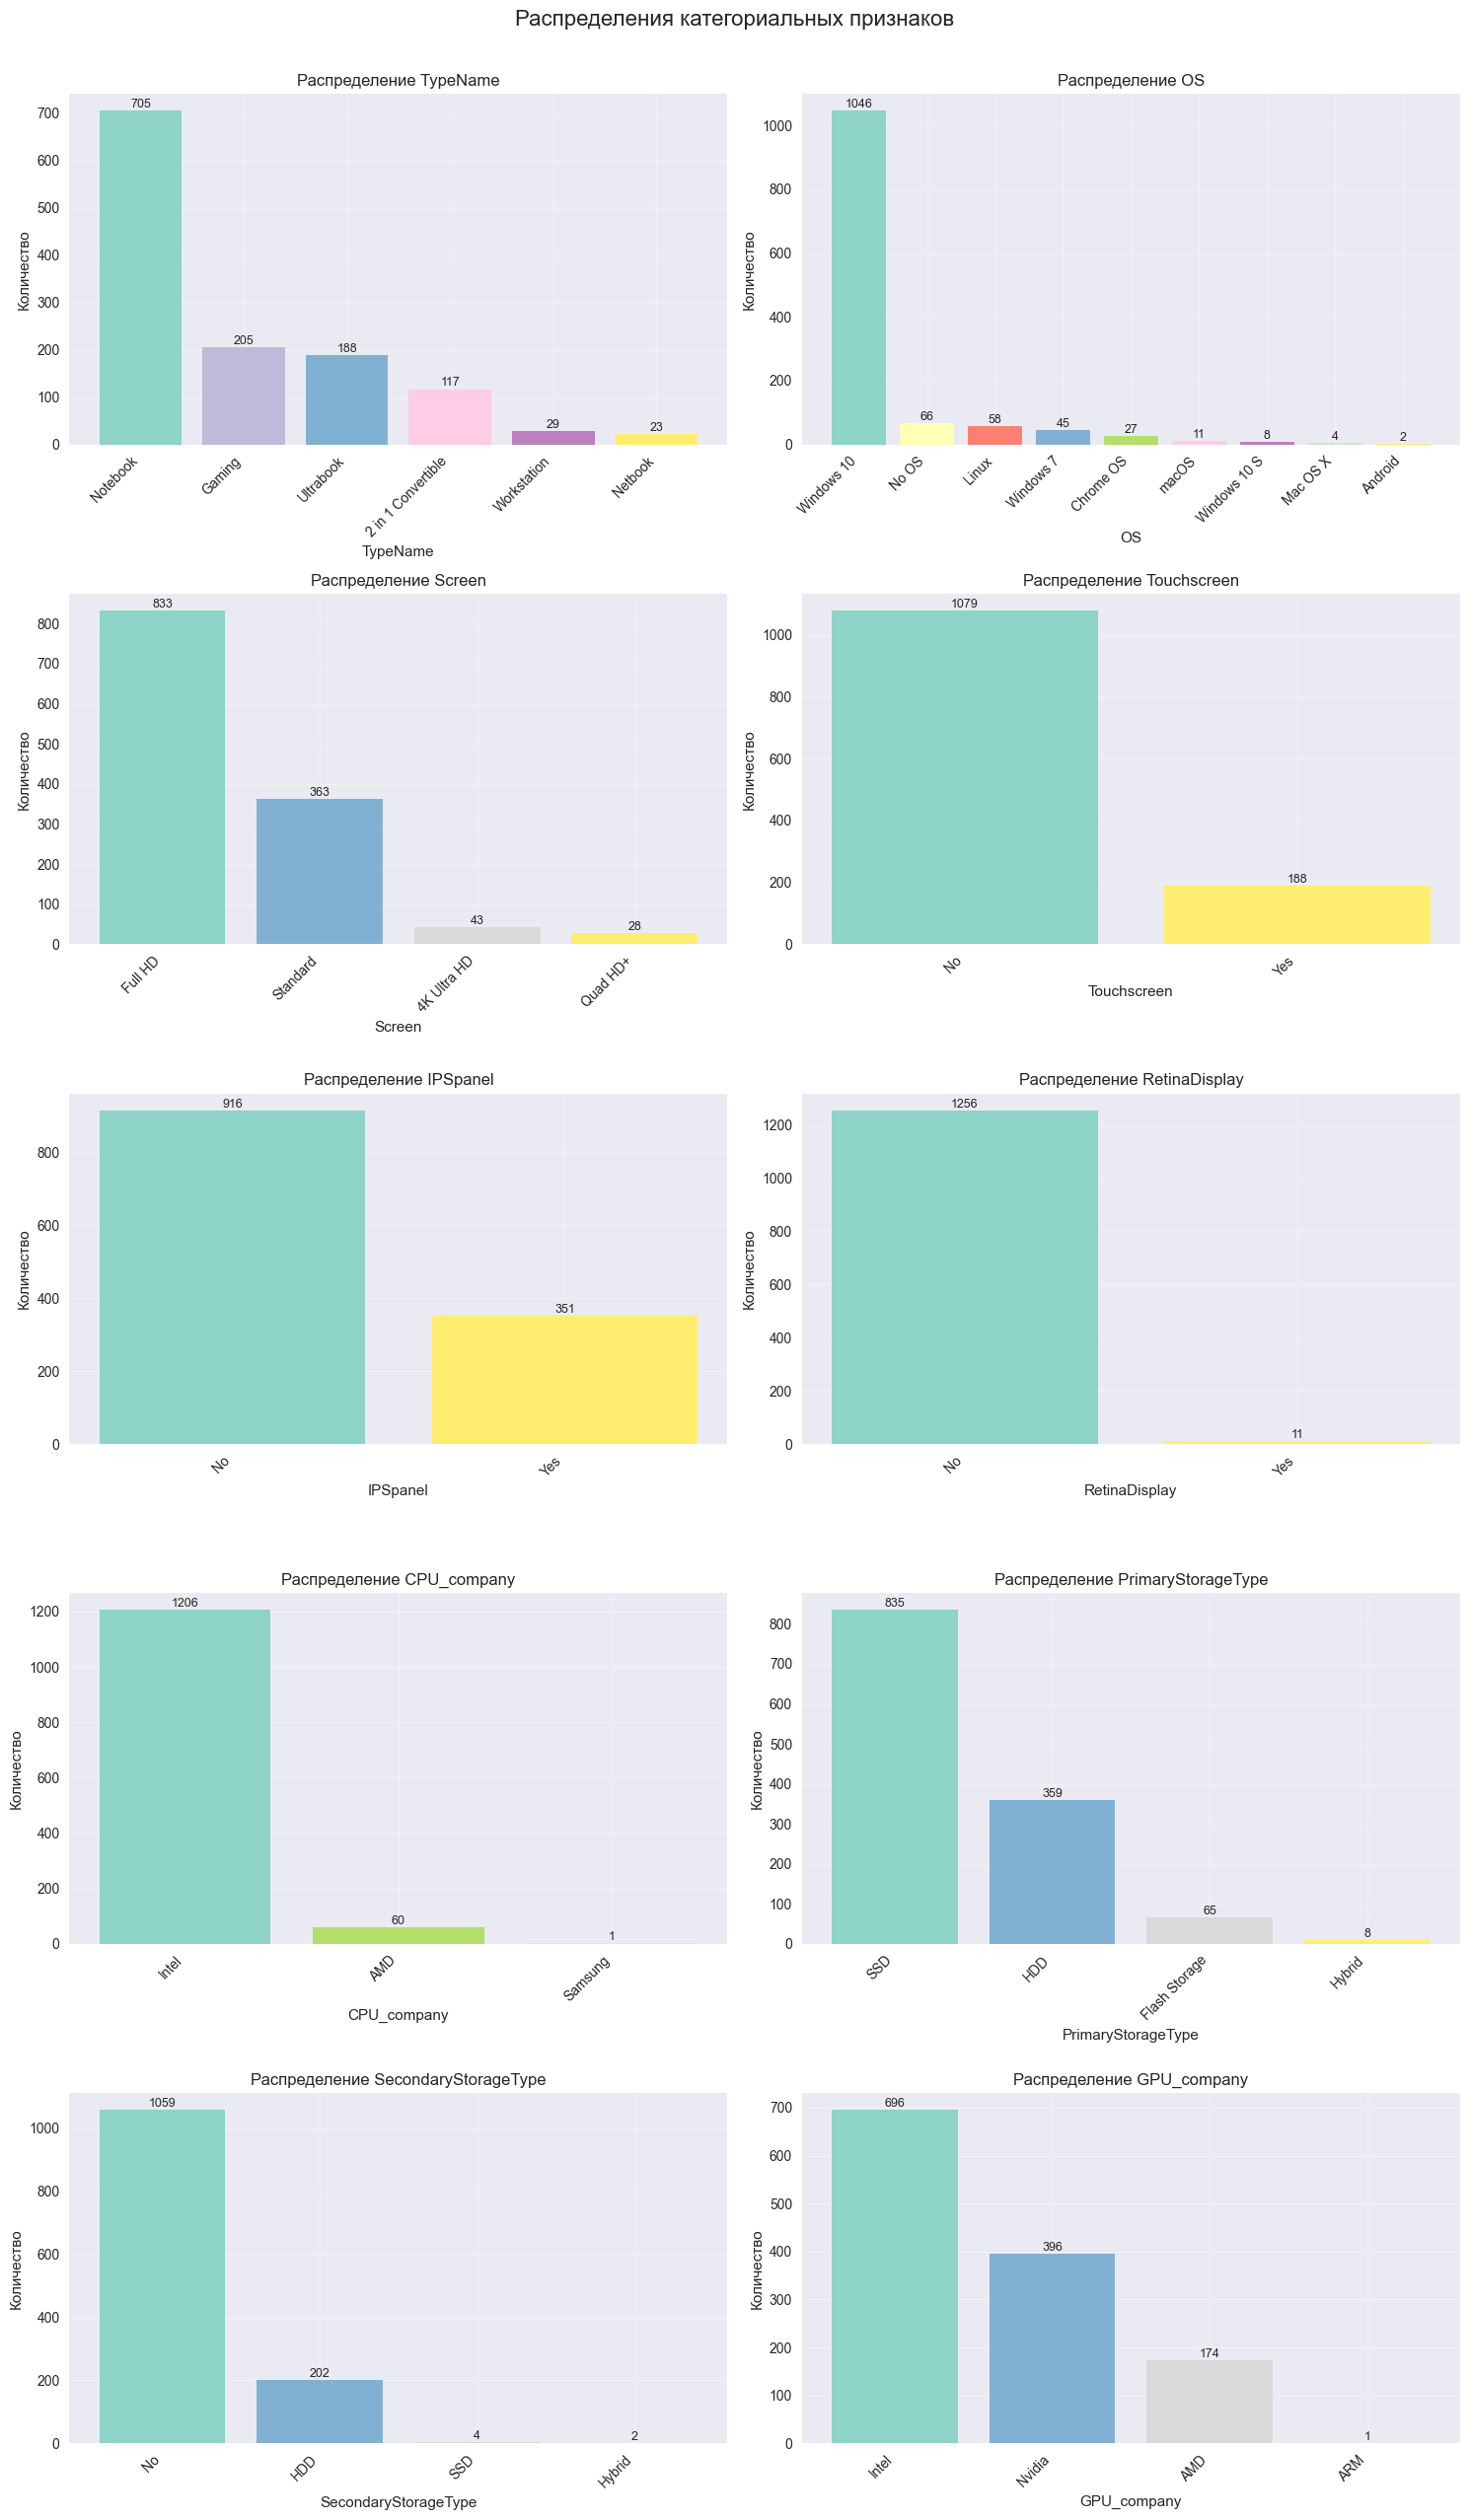


Статистика по цене (Price_euros)

Среднее: 1135.68 евро
Медиана: 985.00 евро
Стандартное отклонение: 701.96 евро
Минимум: 174.00 евро
Максимум: 6099.00 евро
25-й перцентиль: 609.00 евро
75-й перцентиль: 1498.00 евро
Квартильный размах: 889.00 евро


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

data = pd.read_csv("Laptops.csv", sep=",")

print("\nСтатистика по числовым признакам:")
print(data.describe())

print("\nСтатистика по признакам:\n")

#мед и ст
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("\nМедианы числовых признаков:")
print(data[numeric_columns].median())

print("\nСтандартные отклонения числовых признаков:")
print(data[numeric_columns].std())

#мода катег
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nМоды категориальных признаков:")
for col in categorical_columns:
    print(f"{col}: {data[col].mode().iloc[0] if not data[col].mode().empty else 'No mode'}")

#распред цены
plt.figure(figsize=(10, 6))
sns.histplot(data["Price_euros"], bins=30, kde=True, color="blue", alpha=0.7)
plt.title("Распределение цен на ноутбуки (Price_euros)")
plt.xlabel("Цена (евро)")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)
plt.show()

#визуал
numeric_data = data.select_dtypes(include=[np.number])

n_cols = 3
n_rows = (len(numeric_data.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], bins=30, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Распределение {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Распределения числовых признаков датасета Laptops", fontsize=16, y=1.02)
plt.show()

#визуал
categorical_data = data.select_dtypes(include=['object'])

reasonable_categorical = [col for col in categorical_data.columns 
                         if data[col].nunique() <= 20]

if reasonable_categorical:
    n_cols_cat = 2
    n_rows_cat = (len(reasonable_categorical) + n_cols_cat - 1) // n_cols_cat
    
    plt.figure(figsize=(15, n_rows_cat * 5))
    for i, column in enumerate(reasonable_categorical, 1):
        plt.subplot(n_rows_cat, n_cols_cat, i)
        
        value_counts = data[column].value_counts().head(15)  
        
        if len(value_counts) > 0:
            bars = plt.bar(range(len(value_counts)), value_counts.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
            plt.title(f"Распределение {column}")
            plt.xlabel(column)
            plt.ylabel("Количество")
            plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            
            for bar, count in zip(bars, value_counts.values):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(count), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.suptitle("Распределения категориальных признаков", fontsize=16, y=1.02)
    plt.show()

print("\nСтатистика по цене (Price_euros)\n")
price_stats = {
    'Среднее': data['Price_euros'].mean(),
    'Медиана': data['Price_euros'].median(),
    'Стандартное отклонение': data['Price_euros'].std(),
    'Минимум': data['Price_euros'].min(),
    'Максимум': data['Price_euros'].max(),
    '25-й перцентиль': data['Price_euros'].quantile(0.25),
    '75-й перцентиль': data['Price_euros'].quantile(0.75),
    'Квартильный размах': data['Price_euros'].quantile(0.75) - data['Price_euros'].quantile(0.25)
}

for stat, value in price_stats.items():
    print(f"{stat}: {value:.2f} евро")

### На этом этапе проводится первоначальное исследование датасета с ноутбуками для понимания структуры данных и основных закономерностей.
##### Проведенный анализ:
1) Загрузка данных: Датасет содержит информацию о 1267 ноутбуках
2) Статистический анализ: Расчет описательных статистик для числовых и категориальных признаков
3) Визуализация: Построение графиков распределения ключевых переменных

##### На основе проведённого анализа были сделаны следующие выводы:
- Целевая переменная (Price_euros):
Распределение цен правостороннее асимметричное (среднее 1136€ > медиана 985€)
Значительный разброс цен: от 174€ до 6099€
Высокая вариативность (стандартное отклонение 702€)
Половина ноутбуков стоит между 609€ и 1498€

- Качество данных:
Пропуски в данных отсутствуют (все признаки имеют 1267 наблюдений)
Признаки имеют разный масштаб, что потребует стандартизации
Наличие выбросов в ценах и некоторых характеристиках

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Laptops.csv", sep=",", quotechar='"', engine="python")

print("Пропуски до обработки:")
print(df.isna().sum())

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Пропуски обработаны.")

print("Количество нулей по признакам:")
print(df.isnull().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Нулей после обработки:")
print(df.isnull().sum())

selected_cols = [
    "Company", "Inches", "Ram", "Weight",
    "ScreenW", "ScreenH", "CPU_freq",
    "PrimaryStorage", "Touchscreen", "RetinaDisplay"
]
df = df[selected_cols]


for col in ["Touchscreen", "RetinaDisplay"]:
    df[col] = df[col].map({"Yes": 1, "No": 0})

y = pd.read_csv("Laptops.csv")["Price_euros"] 
mean_price = y.groupby(df["Company"]).mean()
df["Company"] = df["Company"].map(mean_price)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

print("Финальное число признаков:", X_scaled.shape[1])
X_scaled.head()


Пропуски до обработки:
Company                 0
Product                 8
TypeName                8
Inches                  8
Ram                     8
OS                      8
Weight                  8
Price_euros             8
Screen                  8
ScreenW                 8
ScreenH                 8
Touchscreen             8
IPSpanel                8
RetinaDisplay           8
CPU_company             8
CPU_freq                8
CPU_model               8
PrimaryStorage          8
SecondaryStorage        8
PrimaryStorageType      8
SecondaryStorageType    8
GPU_company             8
GPU_model               8
dtype: int64
Пропуски обработаны.
Количество нулей по признакам:
Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IP

,Company,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,Touchscreen,RetinaDisplay
0,1.914545,-1.228344,-0.088339,-1.017483,1.344318,1.867441,-0.019425,-0.869714,-0.415876,10.719566
1,1.914545,-1.228344,-0.088339,-1.062633,-0.930399,-0.609088,-1.026443,-0.869714,-0.415876,-0.093287
2,-0.195503,0.398783,-0.088339,-0.280034,0.044480,0.027734,0.383382,-0.518984,-0.415876,-0.093287
3,1.914545,0.257294,1.482544,-0.325184,1.994237,2.575021,0.786190,0.182476,-0.415876,10.719566
4,1.914545,-1.228344,-0.088339,-1.017483,1.344318,1.867441,1.591804,-0.518984,-0.415876,10.719566


### Предобработка данных
##### Выполненные операции:
1. Обработка пропущенных значений:
- Обнаружено 8 пропусков в каждом признаке (равномерное распределение)
- Числовые признаки заполнены средними значениями
- Категориальные признаки заполнены модами

2. Отбор признаков:
- Выбрано 10 наиболее релевантных признаков для моделирования цен
- Исключены избыточные и слабоинформативные переменные

3. Кодирование категориальных переменных:
- Бинарные признаки Touchscreen/RetinaDisplay преобразованы в 1/0
- Компания-производитель закодирована через среднюю цену бренда

4. Стандартизация данных:
- Все числовые признаки приведены к единому масштабу (с исп. StandardScaler)

##### Результат:
1. Исходные пропуски успешно устранен
2. Получена матрица из 10 стандартизированных признаков
3. Данные готовы для построения матрицы корреляций и регрессионного анализа



Проверка на NaN/inf перед VIF:
0 0


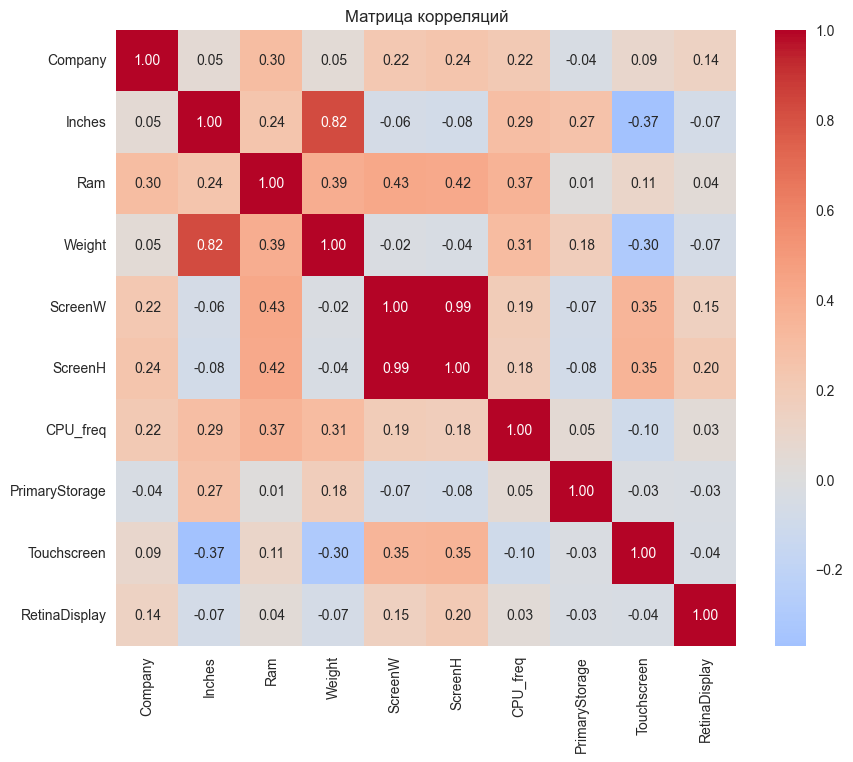

,Feature,VIF
0,Company,1.191913
1,Inches,3.610154
2,Ram,1.729734
3,Weight,3.676992
4,ScreenW,136.772608
5,ScreenH,140.867176
6,CPU_freq,1.260997
7,PrimaryStorage,1.103330
8,Touchscreen,1.404621
9,RetinaDisplay,1.494732


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Laptops.csv", sep=",", quotechar='"', engine="python")

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

selected_cols = [
    "Company", "Inches", "Ram", "Weight",
    "ScreenW", "ScreenH", "CPU_freq",
    "PrimaryStorage", "Touchscreen", "RetinaDisplay"
]
df = df[selected_cols]

for col in ["Touchscreen", "RetinaDisplay"]:
    df[col] = df[col].map({"Yes": 1, "No": 0})

y = pd.read_csv("Laptops.csv")["Price_euros"]

mean_price = y.groupby(df["Company"]).mean()
df["Company"] = df["Company"].map(mean_price)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

print("Проверка на NaN/inf перед VIF:")
print(np.isnan(X_scaled.values).sum(), np.isinf(X_scaled.values).sum())

corr_matrix = X_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
display(vif_data)


Проведенный корреляционный анализ выявил интересные и ожидаемые взаимосвязи между характеристиками ноутбуков. Наиболее яркая находка - почти идеальная корреляция (0.99) между шириной и высотой экрана. Это объясняется тем, что производители придерживаются стандартных соотношений сторон (16:9, 16:10), поэтому эти два параметра фактически дублируют друг друга.

Логичная зависимость обнаружена между размером диагонали и весом устройства (0.82) - закономерно, что 17-дюймовые ноутбуки тяжелее 13-дюймовых ультрабуков. Также интересно наблюдение, что объем оперативной памяти коррелирует с разрешением экрана (0.43) - это отражает рыночную стратегию: производители комплектуют ноутбуки с высоким разрешением дисплея более мощными компонентами, включая RAM.

Расчет коэффициентов инфляции дисперсии (VIF) подтвердил серьезные проблемы в данных. Значения VIF для параметров экрана достигли астрономических 136-140, что значительно превышает умеренный порог в 5-10. Это означает, что модель не сможет достоверно оценить вклад каждого из этих признаков в итоговую цену - они настолько тесно связаны, что статистически неразличимы.

Умеренная мультиколлинеарность обнаружена у размера диагонали и веса (VIF ~3.7), что вполне объяснимо с физической точки зрения. Остальные характеристики - бренд, частота процессора, тип дисплея - демонстрируют здоровые значения VIF, что говорит об их независимости и ценности для модели.

Интерпретация VIF:
- VIF < 5 — нормальный уровень.  
- VIF 5–10 — умеренная мультиколлинеарность.  
- VIF > 10 — сильная мультиколлинеарность (признак следует исключить или обработать).

**Основной вывод: данные содержат избыточную информацию в параметрах экрана. Использование всех признаков в текущем виде приведет к нестабильным и ненадежным оценкам регрессии.**

Линейная:
Средний R² (CV): 0.667
RMSE: 371.75
R²: 0.721
MAPE: 0.286

Гребневая(Ridge)
Средний R² (CV): 0.667
RMSE: 371.52
R²: 0.722
MAPE: 0.286


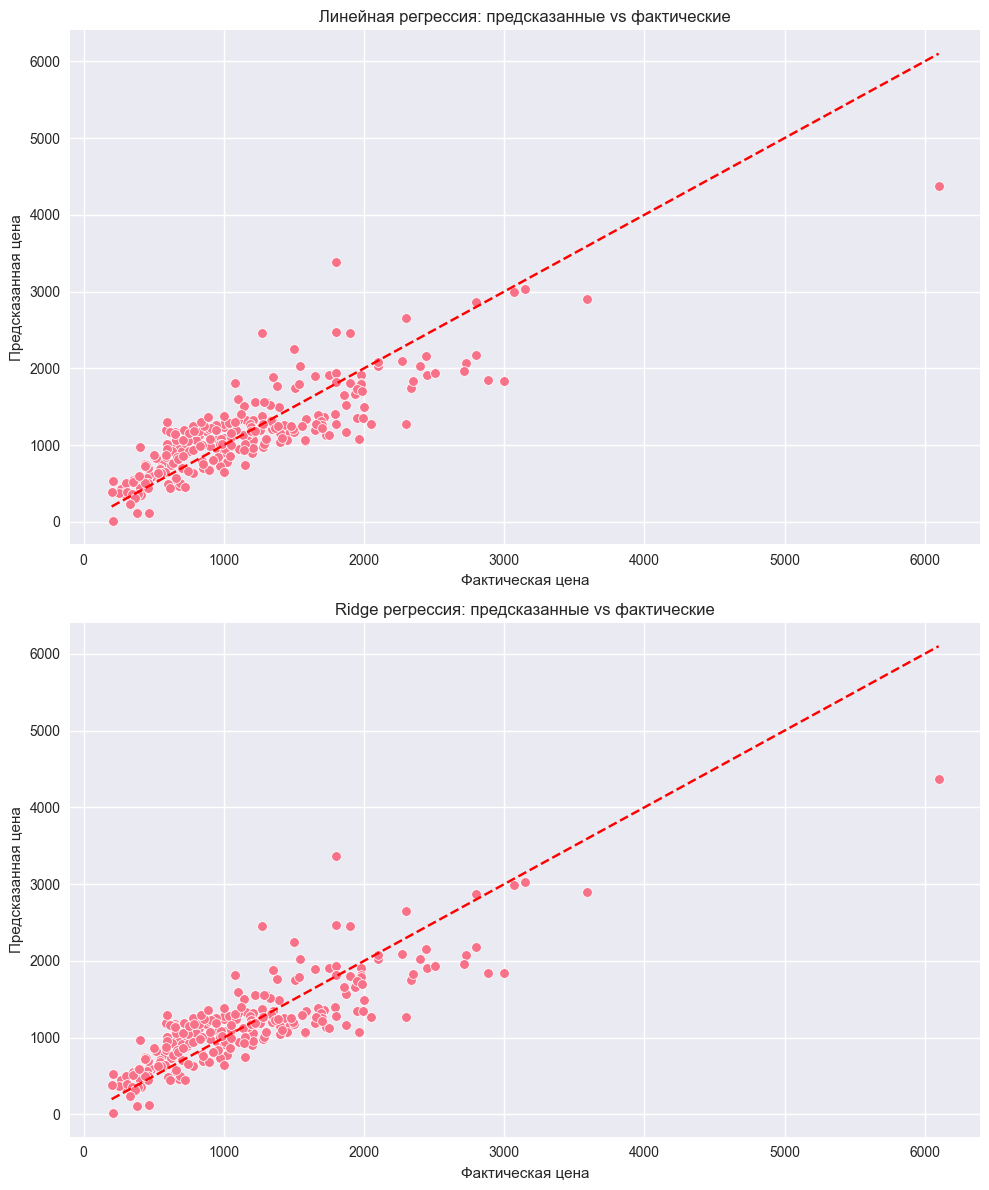

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

X = X_scaled.copy()  

y = pd.read_csv("Laptops.csv")["Price_euros"]

y.fillna(y.mean(), inplace=True)

mean_price = y.groupby(X["Company"]).mean()
X["Company"] = X["Company"].map(mean_price)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Линейная:")
print(f"Средний R² (CV): {cv_scores_lr.mean():.3f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.3f}")
print(f"MAPE: {mape_lr:.3f}")

ridge = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print("\nГребневая(Ridge)")
print(f"Средний R² (CV): {cv_scores_ridge.mean():.3f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.3f}")
print(f"MAPE: {mape_ridge:.3f}")

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Линейная регрессия: предсказанные vs фактические")
axes[0].set_xlabel("Фактическая цена")
axes[0].set_ylabel("Предсказанная цена")

sns.scatterplot(x=y_test, y=y_pred_ridge, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Ridge регрессия: предсказанные vs фактические")
axes[1].set_xlabel("Фактическая цена")
axes[1].set_ylabel("Предсказанная цена")

plt.tight_layout()
plt.show()


На этом этапе мы провели сравнительный анализ двух классических методов регрессии - обычной линейной и гребневой (Ridge) регрессии. Обе модели были обучены на одном наборе данных с разделением на обучающую и тестовую выборки в соотношении 80/20, что обеспечило честную оценку их прогностической способности.

**Результат: сходство**

Обе модели показали практически идентичные результаты, что видно по всем ключевым метрикам:
1) Качество объяснения дисперсии (R²): 0.721-0.722 на тестовых данных, что означает, что модели объясняют около 72% вариативности цен ноутбуков
2) Точность прогноза (RMSE): 371-372 евро - средняя ошибка предсказания
3) Относительная ошибка (MAPE): 28.6% - модели ошибаются в среднем на 29% от фактической цены

Кросс-валидация подтвердила стабильность результатов - средний R² 0.667 показывает, что модели не переобучаются и хорошо обобщают закономерности.

На графиках рассеяния видна четкая линейная зависимость между предсказанными и фактическими значениями для ноутбуков среднего ценового диапазона (до 3000 евро). Однако модели испытывают трудности с:
1) Бюджетными ноутбуками (левая часть графиков) - наблюдается завышение оценок
2) Премиальными моделями (правая часть) - тенденция к занижению реальной стоимости


При этом практически идентичные результаты линейной и гребневой регрессии говорят о том, что мультиколлинеарность, выявленная ранее, не оказывает критического влияния на прогнозную способность, а основная проблема заключается не только в мультиколлинеарности, а в недостаточной информации в признаках для точного прогнозирования некоторых значений.

**Обобщая, текущие модели демонстрируют удовлетворительное, но не отличное качество прогноза. Они хорошо работают для типовых ноутбуков среднего класса, но не справляются с нишевыми и экстремальными случаями.**



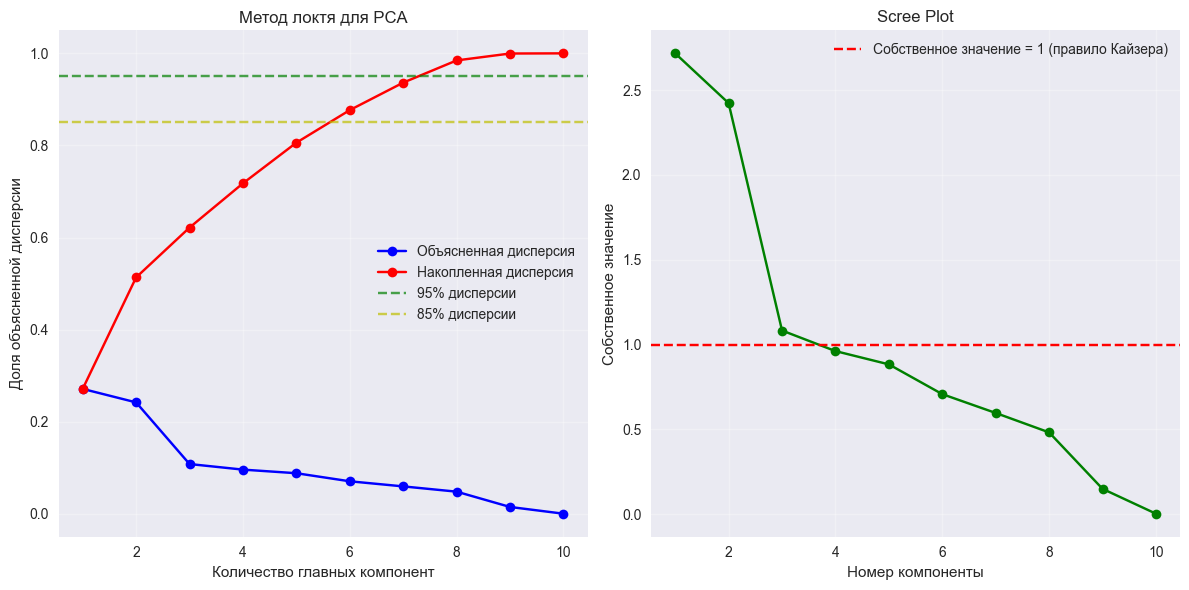

АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ
Объясненная дисперсия по компонентам:
PC1: 0.271 (0.271 cumulative)
PC2: 0.242 (0.513 cumulative)
PC3: 0.108 (0.622 cumulative)
PC4: 0.096 (0.718 cumulative)
PC5: 0.088 (0.806 cumulative)
PC6: 0.071 (0.877 cumulative)
PC7: 0.060 (0.936 cumulative)
PC8: 0.048 (0.985 cumulative)
PC9: 0.015 (1.000 cumulative)
PC10: 0.000 (1.000 cumulative)

Оптимальное количество компонент:
- Для 95% дисперсии: 8
- Для 85% дисперсии: 6

Применен PCA с 6 компонентами
Объясненная дисперсия: 0.877


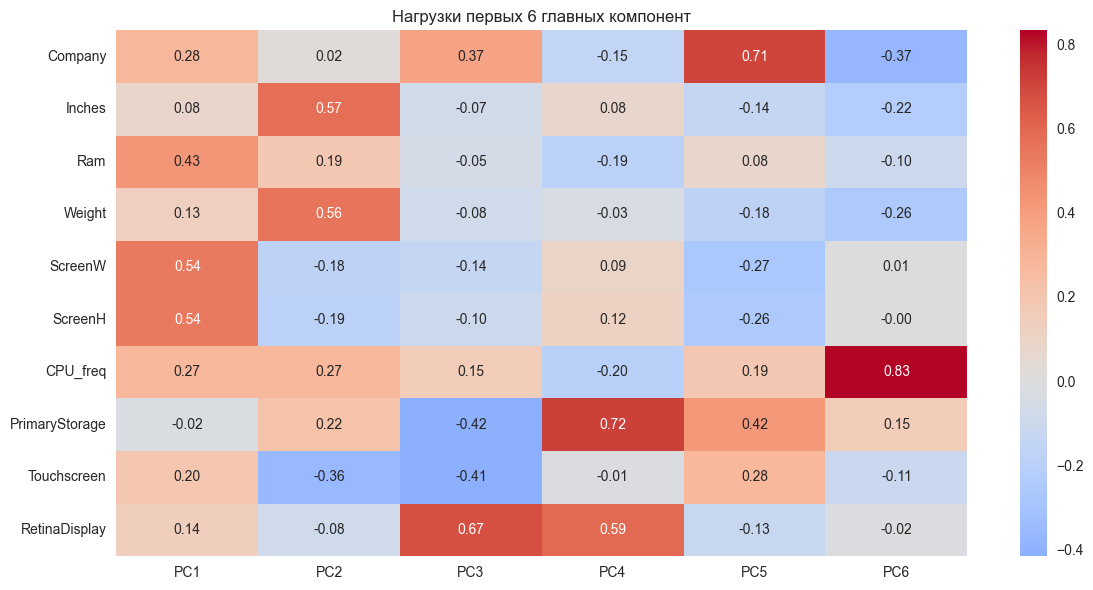


СРАВНЕНИЕ МОДЕЛЕЙ ДО И ПОСЛЕ PCA

ИСХОДНЫЕ ПРИЗНАКИ (10 признаков):
R² (CV): 0.663
R² (test): 0.722
RMSE: 371.52

PCA ПРИЗНАКИ (6 компонент):
R² (CV): 0.608
R² (test): 0.636
RMSE: 424.77


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', label='Объясненная дисперсия')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Накопленная дисперсия')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% дисперсии')
plt.axhline(y=0.85, color='y', linestyle='--', alpha=0.7, label='85% дисперсии')

plt.xlabel('Количество главных компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Метод локтя для PCA')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
eigenvalues = pca_full.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'go-')
plt.axhline(y=1, color='r', linestyle='--', label='Собственное значение = 1 (правило Кайзера)')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.title('Scree Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ")
print("=" * 60)

print("Объясненная дисперсия по компонентам:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {var:.3f} ({cum_var:.3f} cumulative)")

optimal_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
optimal_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

print(f"\nОптимальное количество компонент:")
print(f"- Для 95% дисперсии: {optimal_components_95}")
print(f"- Для 85% дисперсии: {optimal_components_85}")

n_components = optimal_components_85  #optimal_components_95

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"\nПрименен PCA с {n_components} компонентами")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_.sum():.3f}")

plt.figure(figsize=(12, 6))
component_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X_scaled.columns
)

sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title(f'Нагрузки первых {n_components} главных компонент')
plt.tight_layout()
plt.show()

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

ridge_original = Ridge(alpha=1.0)
cv_scores_original = cross_val_score(ridge_original, X_train, y_train, cv=5, scoring='r2')
ridge_original.fit(X_train, y_train)
y_pred_original = ridge_original.predict(X_test)

ridge_pca = Ridge(alpha=1.0)
cv_scores_pca = cross_val_score(ridge_pca, X_train_pca, y_train, cv=5, scoring='r2')
ridge_pca.fit(X_train_pca, y_train)
y_pred_pca = ridge_pca.predict(X_test_pca)

print("\n" + "=" * 60)
print("СРАВНЕНИЕ МОДЕЛЕЙ ДО И ПОСЛЕ PCA")
print("=" * 60)

print(f"\nИСХОДНЫЕ ПРИЗНАКИ ({X_scaled.shape[1]} признаков):")
print(f"R² (CV): {cv_scores_original.mean():.3f}")
print(f"R² (test): {r2_score(y_test, y_pred_original):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_original)):.2f}")

print(f"\nPCA ПРИЗНАКИ ({n_components} компонент):")
print(f"R² (CV): {cv_scores_pca.mean():.3f}")
print(f"R² (test): {r2_score(y_test, y_pred_pca):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_pca)):.2f}")

Проведенный анализ главных компонент позволил глубоко понять структуру наших данных и найти баланс между сокращением размерности и сохранением полезной информации.

График "локтя" наглядно демонстрирует, как каждая последующая компонента добавляет все меньше информации:
1) Первые 2 компоненты несут более 50% всей дисперсии - это настоящие "тяжеловесы" информации
2) Компоненты 3-6 добавляют еще 36%, достигая в сумме ~87.7%
3) Последние 4 компоненты дают всего около 12.3%, причем последние две практически бесполезны

Scree plot с правилом Кайзера (собственное значение > 1) подтверждает: только первые 6 компонент содержат значимую информацию, остальные - скорее шум.

Анализ нагрузок раскрывает содержательную интерпретацию каждой компоненты:  
**PC1 - "Мощность и производительность" (27.1% дисперсии)**
- Сильнее всего связана с разрешением экрана (0.54), объемом RAM (0.43) и брендом (0.28)
- Отражает общий уровень оснащения и премиальность ноутбука

**PC2 - "Физические характеристики" (24.2% дисперсии)**
- Доминируют размер диагонали (0.57) и вес (0.56)
- Описывает габариты и портативность устройства

**PC3 - "Премиальные дисплейные технологии" (10.8% дисперсии)**
- RetinaDisplay (0.67) в положительной зоне, Touchscreen (-0.41) в отрицательной
- Показывает наличие продвинутых дисплейных решений

**PC4-PC6** - более специализированные компоненты, связанные с конфигурацией накопителей и процессорными характеристиками

Таким образом, следует использовать **6 компонент вместо 10 признаков** (с небольшой потерей точности, как будет показано дальше). Сравнительный анализ уже на этом этапе показывает, что переход к главным компонентам несколько снижает прогнозную точность (R² падает с 0.722 до 0.636), но это плата за устранение мультиколлинеарности и повышение устойчивости модели.

<Figure size 1500x500 with 0 Axes>

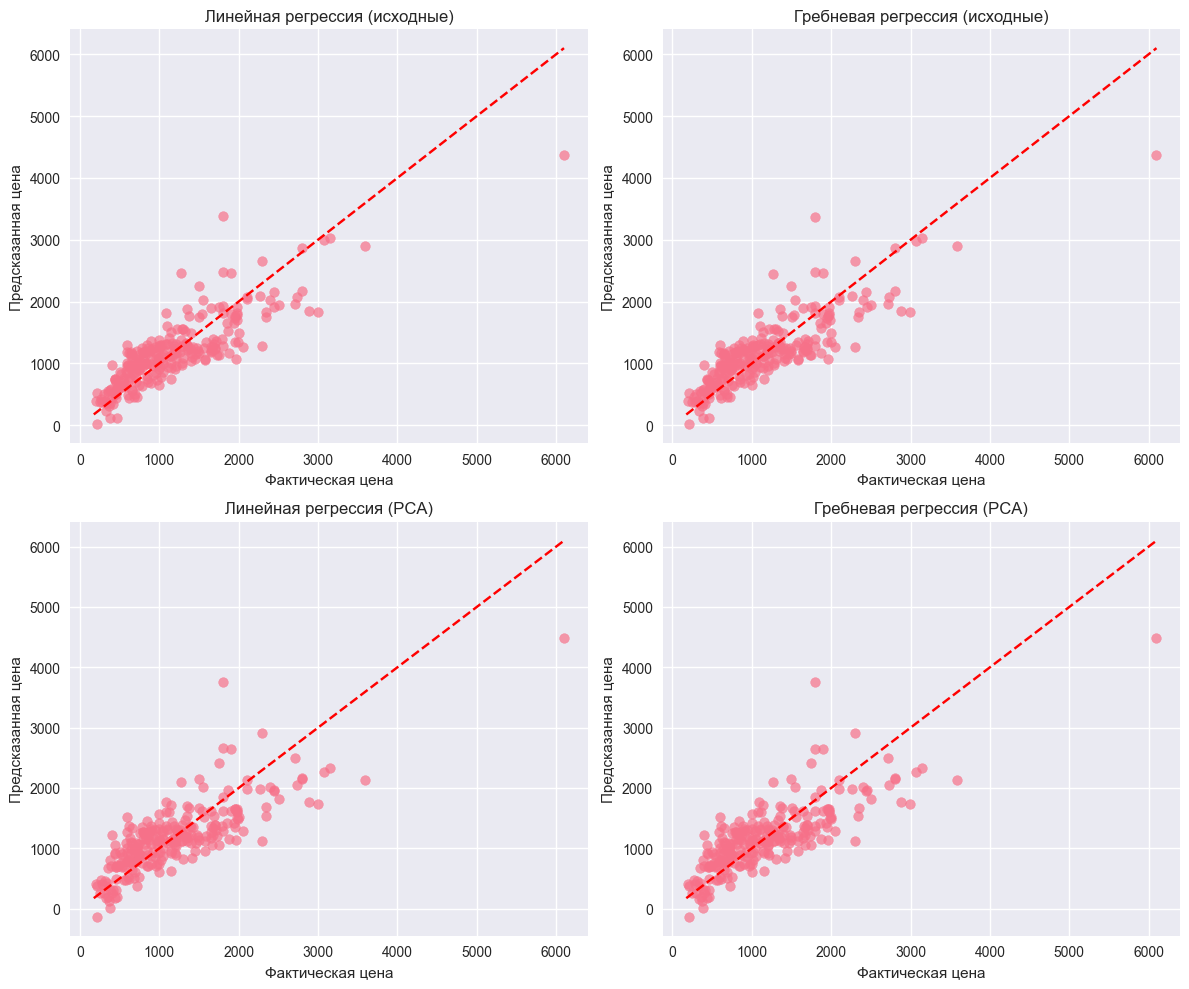

Сравнение метрик качества:

Линейная регрессия (исходные):
Средний R² (CV): 0.667
RMSE: 371.75
R²: 0.721
MAPE: 0.286

Гребневая регрессия (исходные):
Средний R² (CV): 0.667
RMSE: 371.52
R²: 0.722
MAPE: 0.286

Линейная регрессия (PCA):
Средний R² (CV): 0.609
RMSE: 424.76
R²: 0.636
MAPE: 0.334

Гребневая регрессия (PCA):
Средний R² (CV): 0.609
RMSE: 424.77
R²: 0.636
MAPE: 0.334

Лучшая исходная модель R²: 0.7216
Лучшая PCA модель R²: 0.6361
Изменение R²: -0.0855


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

X = X_scaled.copy()  
y = pd.read_csv("Laptops.csv")["Price_euros"]

y.fillna(y.mean(), inplace=True)
mean_price = y.groupby(X["Company"]).mean()
X["Company"] = X["Company"].map(mean_price)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_orig = LinearRegression()
cv_scores_lr_orig = cross_val_score(lr_orig, X_train_orig, y_train_orig, cv=kf, scoring='r2')
lr_orig.fit(X_train_orig, y_train_orig)
y_pred_lr_orig = lr_orig.predict(X_test_orig)

rmse_lr_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_lr_orig))
r2_lr_orig = r2_score(y_test_orig, y_pred_lr_orig)
mape_lr_orig = mean_absolute_percentage_error(y_test_orig, y_pred_lr_orig)

ridge_orig = Ridge(alpha=1.0)
cv_scores_ridge_orig = cross_val_score(ridge_orig, X_train_orig, y_train_orig, cv=kf, scoring='r2')
ridge_orig.fit(X_train_orig, y_train_orig)
y_pred_ridge_orig = ridge_orig.predict(X_test_orig)

rmse_ridge_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_ridge_orig))
r2_ridge_orig = r2_score(y_test_orig, y_pred_ridge_orig)
mape_ridge_orig = mean_absolute_percentage_error(y_test_orig, y_pred_ridge_orig)

pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LinearRegression()
cv_scores_lr_pca = cross_val_score(lr_pca, X_train_pca, y_train_pca, cv=kf, scoring='r2')
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

rmse_lr_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_lr_pca))
r2_lr_pca = r2_score(y_test_pca, y_pred_lr_pca)
mape_lr_pca = mean_absolute_percentage_error(y_test_pca, y_pred_lr_pca)

ridge_pca = Ridge(alpha=1.0)
cv_scores_ridge_pca = cross_val_score(ridge_pca, X_train_pca, y_train_pca, cv=kf, scoring='r2')
ridge_pca.fit(X_train_pca, y_train_pca)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)

rmse_ridge_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_ridge_pca))
r2_ridge_pca = r2_score(y_test_pca, y_pred_ridge_pca)
mape_ridge_pca = mean_absolute_percentage_error(y_test_pca, y_pred_ridge_pca)

plt.figure(figsize=(15, 5))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(y_test_orig, y_pred_lr_orig, alpha=0.7)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 0].set_title('Линейная регрессия (исходные)')
axes[0, 0].set_xlabel('Фактическая цена')
axes[0, 0].set_ylabel('Предсказанная цена')

axes[0, 1].scatter(y_test_orig, y_pred_ridge_orig, alpha=0.7)
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 1].set_title('Гребневая регрессия (исходные)')
axes[0, 1].set_xlabel('Фактическая цена')
axes[0, 1].set_ylabel('Предсказанная цена')

axes[1, 0].scatter(y_test_pca, y_pred_lr_pca, alpha=0.7)
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[1, 0].set_title('Линейная регрессия (PCA)')
axes[1, 0].set_xlabel('Фактическая цена')
axes[1, 0].set_ylabel('Предсказанная цена')

axes[1, 1].scatter(y_test_pca, y_pred_ridge_pca, alpha=0.7)
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[1, 1].set_title('Гребневая регрессия (PCA)')
axes[1, 1].set_xlabel('Фактическая цена')
axes[1, 1].set_ylabel('Предсказанная цена')

plt.tight_layout()
plt.show()

print("Сравнение метрик качества:")
print("\nЛинейная регрессия (исходные):")
print(f"Средний R² (CV): {cv_scores_lr_orig.mean():.3f}")
print(f"RMSE: {rmse_lr_orig:.2f}")
print(f"R²: {r2_lr_orig:.3f}")
print(f"MAPE: {mape_lr_orig:.3f}")

print("\nГребневая регрессия (исходные):")
print(f"Средний R² (CV): {cv_scores_ridge_orig.mean():.3f}")
print(f"RMSE: {rmse_ridge_orig:.2f}")
print(f"R²: {r2_ridge_orig:.3f}")
print(f"MAPE: {mape_ridge_orig:.3f}")

print("\nЛинейная регрессия (PCA):")
print(f"Средний R² (CV): {cv_scores_lr_pca.mean():.3f}")
print(f"RMSE: {rmse_lr_pca:.2f}")
print(f"R²: {r2_lr_pca:.3f}")
print(f"MAPE: {mape_lr_pca:.3f}")

print("\nГребневая регрессия (PCA):")
print(f"Средний R² (CV): {cv_scores_ridge_pca.mean():.3f}")
print(f"RMSE: {rmse_ridge_pca:.2f}")
print(f"R²: {r2_ridge_pca:.3f}")
print(f"MAPE: {mape_ridge_pca:.3f}")

best_original_r2 = max(r2_lr_orig, r2_ridge_orig)
best_pca_r2 = max(r2_lr_pca, r2_ridge_pca)

print(f"\nЛучшая исходная модель R²: {best_original_r2:.4f}")
print(f"Лучшая PCA модель R²: {best_pca_r2:.4f}")
print(f"Изменение R²: {best_pca_r2 - best_original_r2:+.4f}")

Было проведено прямое сравнение четырех моделей, чтобы определить, дает ли PCA реальные преимущества несмотря на потерю части информации.

Модели на исходных признаках показали убедительное превосходство:
- R²: ~0.721-0.722 против 0.636 у PCA-моделей
- RMSE: ~371€ против ~424€ - ошибка выросла на 53 евро
- MAPE: ~28.6% против ~33.4% - относительная ошибка увеличилась почти на 5 процентов

Что особенно показательно - и линейная, и гребневая регрессии дали практически идентичные результаты в каждой группе, подтверждая, что основная разница определяется не типом модели, а выбором признаков.

На графиках рассеяния хорошо видно, что PCA-модели:
- Хуже предсказывают экстремальные значения - точки сильнее разбросаны в области дорогих ноутбуков
- Имеют более консервативный диапазон предсказаний - реже выдают очень высокие или очень низкие оценки
- Сохраняют общую линейную зависимость, но с большим разбросом вокруг идеальной линии

Ухудшение качества прогноза можно объяснить следующим образом:
1) Потеря специфической информации - PCA создает обобщенные компоненты, которые могут "замыливать" уникальные особенности отдельных признаков
2) Мультиколлинеарность не была критической проблемой - как мы видели ранее, линейная и гребневая регрессии на исходных данных работали практически одинаково, что свидетельствует об отсутствии серьезных проблем с устойчивостью

Метод главных компонент не оправдал себя в данной задаче прогнозирования цен на ноутбуки. **Лучшие результаты достигаются при использовании исходных признаков с обычной линейной или гребневой регрессией.**